In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
test_meta = pd.read_csv('training_set_metadata.csv')
print(test_meta.columns.values)

['object_id' 'ra' 'decl' 'gal_l' 'gal_b' 'ddf' 'hostgal_specz'
 'hostgal_photoz' 'hostgal_photoz_err' 'distmod' 'mwebv' 'target']


# Explore redshift on classification 

In [17]:
plt.style.use('HCH_plotstyle')
%matplotlib notebook

def plot_scatter(df, x_col ='', y_col = '', title = ''):
    plt.figure()
    plt.scatter(df[x_col],df[y_col], s = 1)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.tight_layout()
    plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


<IPython.core.display.Javascript object>


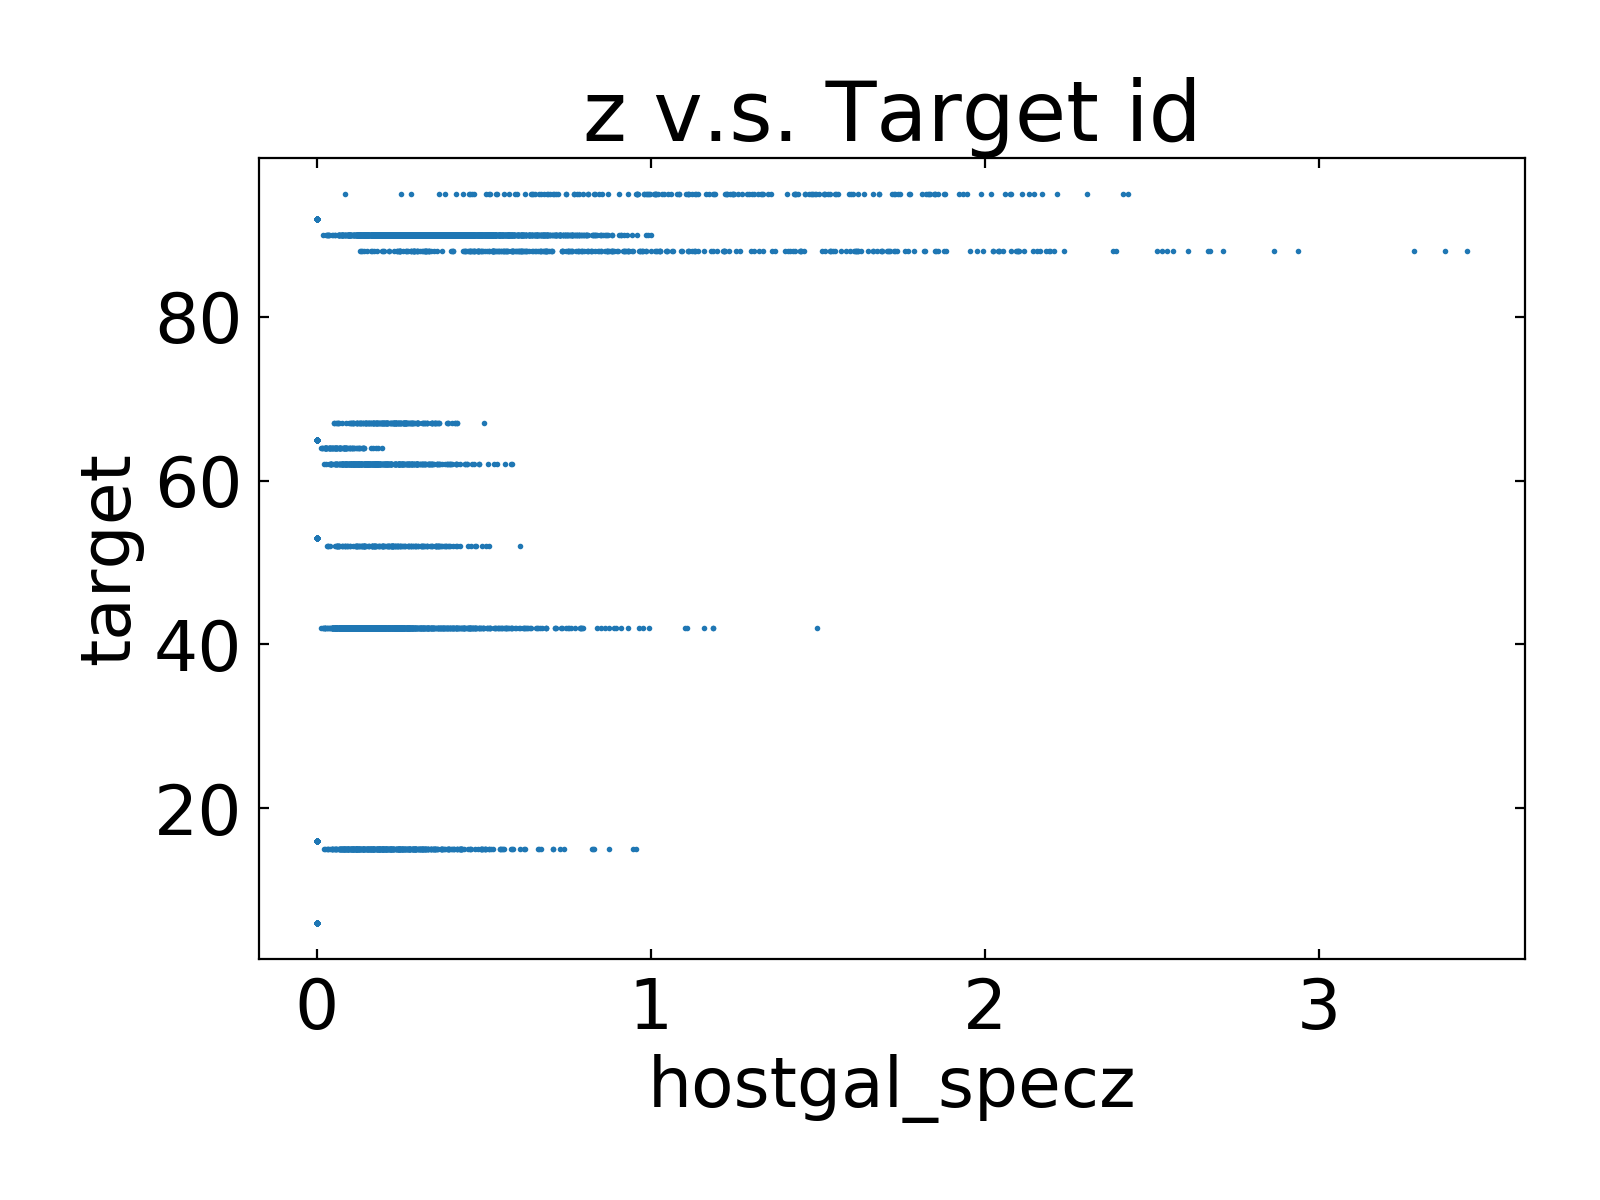

In [18]:
plot_scatter(test_meta, x_col = 'hostgal_specz', y_col = 'target', title = 'z v.s. Target id')

# The above plot tells us 2 things: 
1. There are two categories of object when classifying by redshift. 
2. __Class 1__:~5 classes are local (meaning they only having spec_z = 0) and __Class 2__: 9 classes's host galaxies spread across a wide range of spectroscopic redshifts.  

<IPython.core.display.Javascript object>


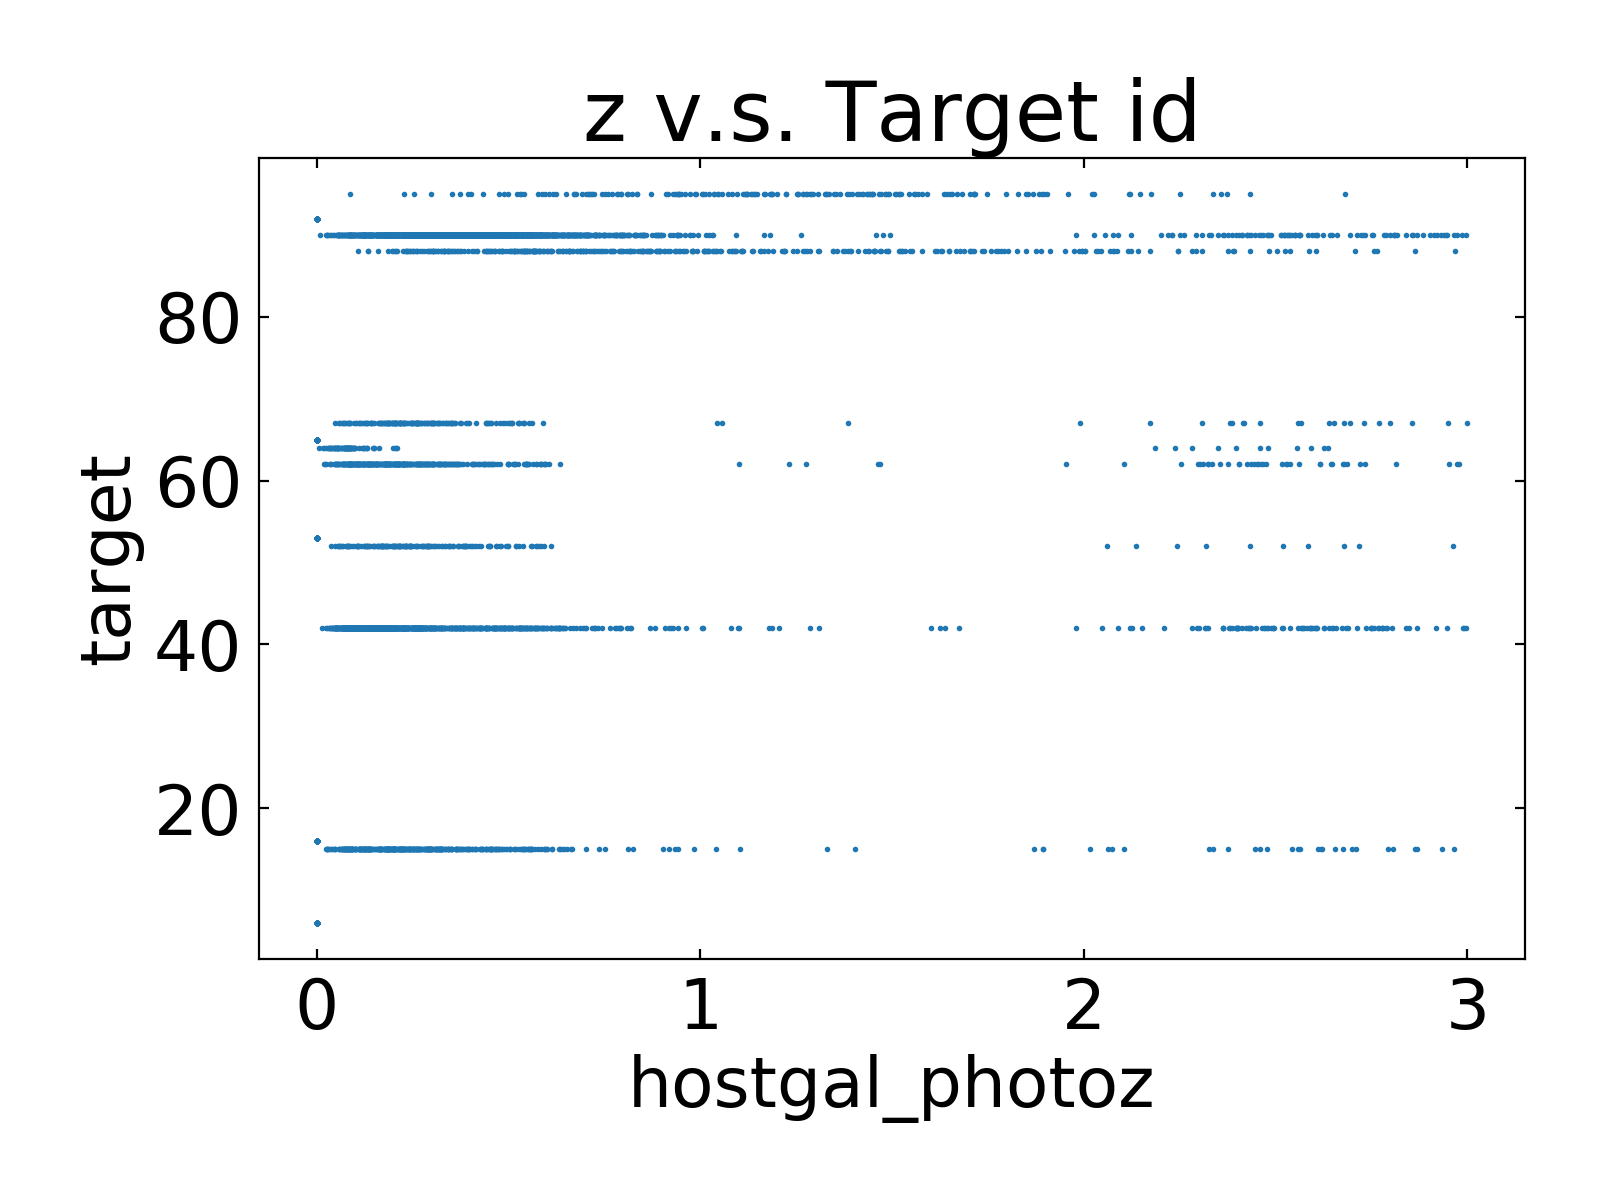

In [59]:
plot_scatter(test_meta, x_col = 'hostgal_photoz', \
             y_col = 'target', title = 'z v.s. Target id')

# The above plot tells us 2 things, again : 
1. Photometric z does a good job in terms of estimating z = 0. One sees the exact same 5 classes that only lives in local universe.   
2. The photometric z estimates spectroscopy z poorly for non zero z values. 

<IPython.core.display.Javascript object>


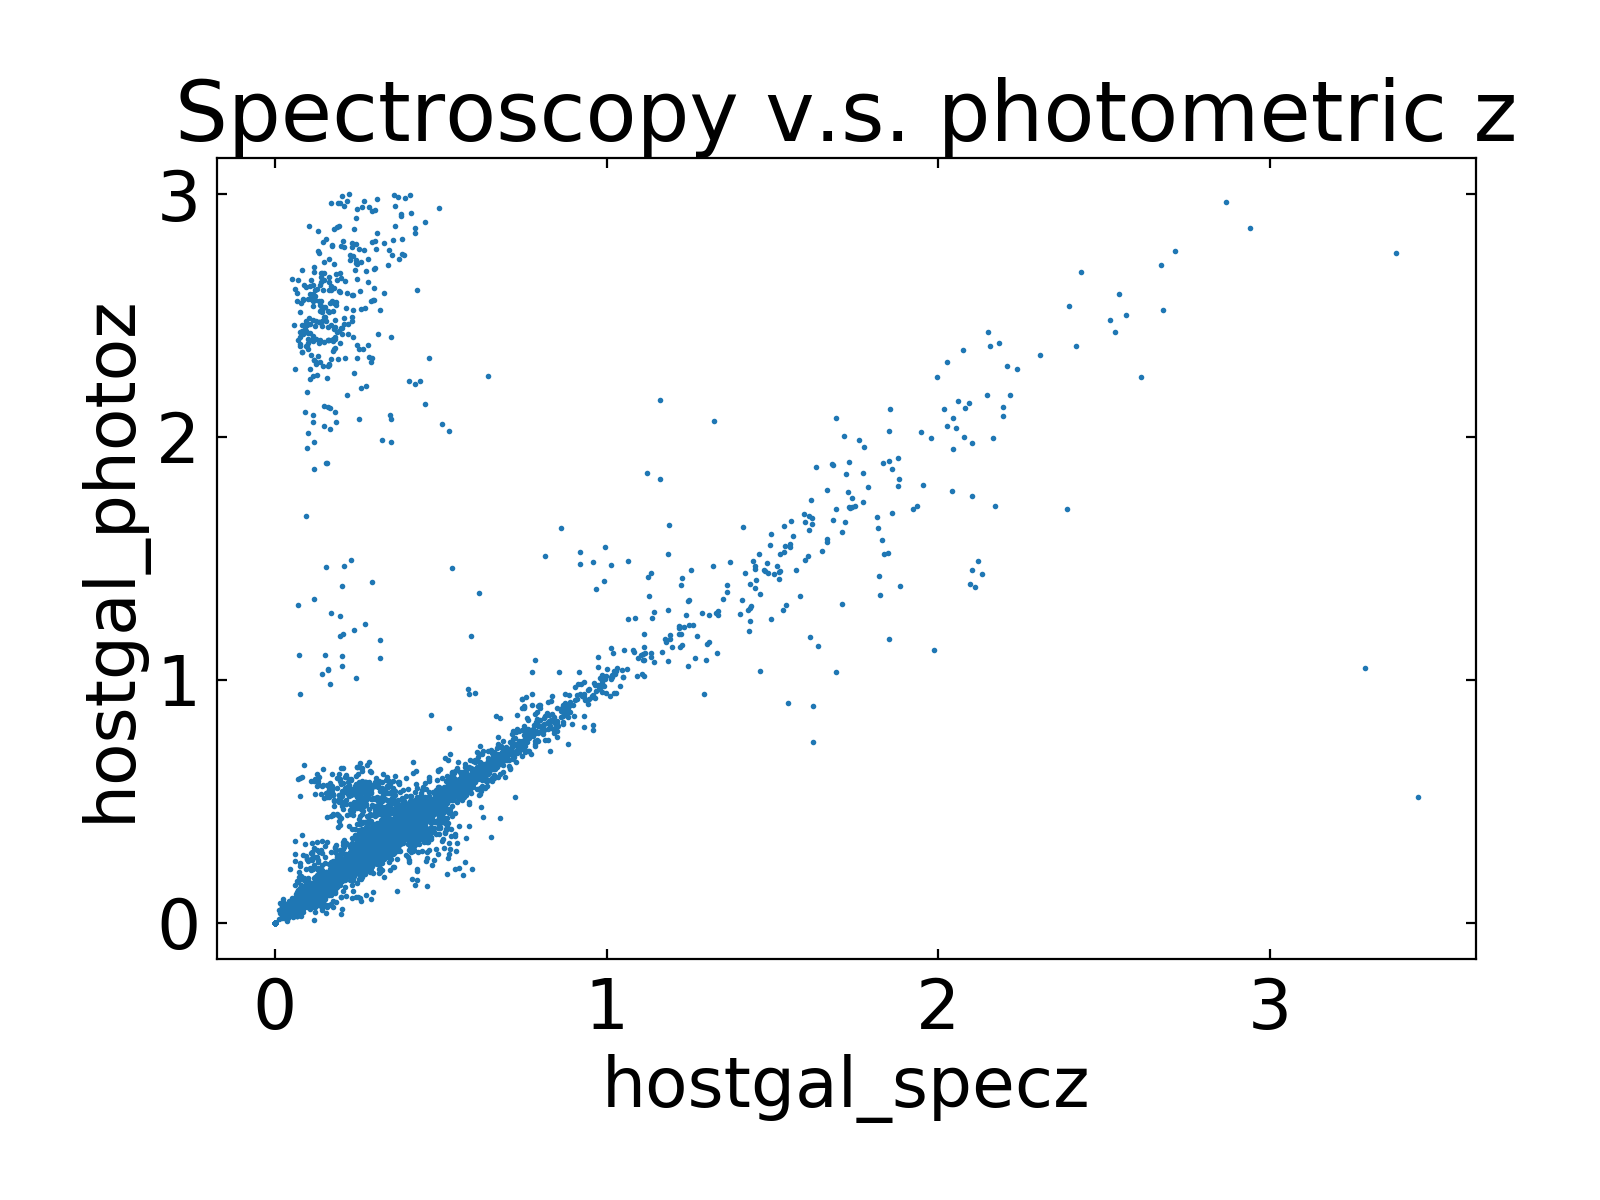

In [60]:
plot_scatter(test_meta, x_col = 'hostgal_specz', \
             y_col = 'hostgal_photoz', title = 'Spectroscopy v.s. photometric z')

# Take a closer look at the the local objects classes using Hsiang-Chih's reduced data.

In [49]:
grouped = test_meta.groupby(['target'])
class1 = []
class2 = []
for key in zip(grouped.groups.keys()): 
#     print(key[0])
    if( grouped.get_group(key[0]).hostgal_specz.std() <= 0.0):
        class1.append(key[0])
    else:
        class2.append(key[0])

In [50]:
print("Class 1 objects have target ids", class1,\
      "\n Class 2 obj have target ids", class2)

Class 1 objects have target ids [6, 16, 53, 65, 92] 
 Class 2 obj have target ids [15, 42, 52, 62, 64, 67, 88, 90, 95]


In [51]:
df_HCH = pd.read_csv('HCH/1024_0_training.csv')

In [52]:
df_HCH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 22 columns):
object_id          7848 non-null int64
target             7848 non-null int64
2_N                7848 non-null int64
2_brighter_frac    7848 non-null float64
2_mag_05           7848 non-null float64
2_mag_95           7848 non-null float64
2_mean             7848 non-null float64
2_median           7848 non-null float64
2_ppamp_90         7848 non-null float64
2_std              7848 non-null float64
2_lr_slope         7848 non-null float64
3_N                7848 non-null int64
3_brighter_frac    7848 non-null float64
3_mag_05           7848 non-null float64
3_mag_95           7848 non-null float64
3_mean             7848 non-null float64
3_median           7848 non-null float64
3_ppamp_90         7848 non-null float64
3_std              7848 non-null float64
3_lr_slope         7848 non-null float64
2_AOV_amp          7848 non-null float64
2_AOV_P            7848 non-null float64

In [57]:
df_HCH['3_N']

0       58
1       56
2       52
3       56
4       58
5       52
6       58
7       58
8       45
9       45
10      56
11      58
12      56
13      56
14      58
15      56
16      58
17      58
18      45
19      58
20      45
21      56
22      56
23      56
24      56
25      45
26      56
27      45
28      58
29      52
        ..
7818    22
7819    24
7820    26
7821    27
7822    24
7823    26
7824    18
7825    23
7826    22
7827    13
7828    21
7829    22
7830    17
7831    22
7832    23
7833    24
7834    22
7835    19
7836    14
7837    22
7838    19
7839    20
7840    20
7841    22
7842    19
7843    25
7844    14
7845    17
7846    25
7847    22
Name: 3_N, dtype: int64